In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

In [2]:
df=pd.read_csv('/content/Processed_Data_v2.zip')

In [3]:
df.head()

,CRASH DATE,CRASH TIME,LATITUDE,LONGITUDE,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,CLASS TYPE
0,2021-09-11,09:35:00,40.667202,-73.866500,Unspecified,No factor,No factor,No factor,No factor,Sedan,No vehicle,No vehicle,No vehicle,No vehicle,Class 0
1,2021-12-14,08:17:00,40.868160,-73.831480,Unspecified,Unspecified,No factor,No factor,No factor,Sedan,Sedan,No vehicle,No vehicle,No vehicle,Class 1
2,2021-12-14,14:58:00,40.751440,-73.973970,Passing Too Closely,Unspecified,No factor,No factor,No factor,Sedan,Station Wagon/Sport Utility Vehicle,No vehicle,No vehicle,No vehicle,Class 0
3,2021-12-14,16:50:00,40.675884,-73.755770,Turning Improperly,Unspecified,No factor,No factor,No factor,Sedan,Station Wagon/Sport Utility Vehicle,No vehicle,No vehicle,No vehicle,Class 0
4,2021-12-11,19:43:00,40.872620,-73.904686,Unspecified,Unspecified,No factor,No factor,No factor,Station Wagon/Sport Utility Vehicle,Sedan,No vehicle,No vehicle,No vehicle,Class 1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057417 entries, 0 to 1057416
Data columns (total 15 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   CRASH DATE                     1057417 non-null  object 
 1   CRASH TIME                     1057417 non-null  object 
 2   LATITUDE                       1057417 non-null  float64
 3   LONGITUDE                      1057417 non-null  float64
 4   CONTRIBUTING FACTOR VEHICLE 1  1057417 non-null  object 
 5   CONTRIBUTING FACTOR VEHICLE 2  1057417 non-null  object 
 6   CONTRIBUTING FACTOR VEHICLE 3  1057417 non-null  object 
 7   CONTRIBUTING FACTOR VEHICLE 4  1057417 non-null  object 
 8   CONTRIBUTING FACTOR VEHICLE 5  1057417 non-null  object 
 9   VEHICLE TYPE CODE 1            1057417 non-null  object 
 10  VEHICLE TYPE CODE 2            1057417 non-null  object 
 11  VEHICLE TYPE CODE 3            1057417 non-null  object 
 12  VEHICLE TYPE C

In [16]:
df.isna().sum()

CRASH DATE                       0
CRASH TIME                       0
LATITUDE                         0
LONGITUDE                        0
CONTRIBUTING FACTOR VEHICLE 1    0
CONTRIBUTING FACTOR VEHICLE 2    0
CONTRIBUTING FACTOR VEHICLE 3    0
CONTRIBUTING FACTOR VEHICLE 4    0
CONTRIBUTING FACTOR VEHICLE 5    0
VEHICLE TYPE CODE 1              0
VEHICLE TYPE CODE 2              0
VEHICLE TYPE CODE 3              0
VEHICLE TYPE CODE 4              0
VEHICLE TYPE CODE 5              0
CLASS TYPE                       0
dtype: int64

In [17]:
df['CLASS TYPE'].value_counts()

CLASS TYPE
Class 0    824193
Class 1    231289
Class 2      1030
Class 3       905
Name: count, dtype: int64

In [19]:
print(df['CLASS TYPE'].unique())

['Class 0' 'Class 1' 'Class 3' 'Class 2']


In [21]:
df['CLASS TYPE'] = df['CLASS TYPE'].replace({'Class 0': 0, 'Class 1': 1, 'Class 2': 1, 'Class 3': 1})

In [22]:
df['CLASS TYPE'].value_counts()

CLASS TYPE
0    824193
1    233224
Name: count, dtype: int64

In [23]:
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'])

<ipython-input-23-b6c7147c979f>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'])


In [28]:
df['YEAR'] = df['CRASH DATE'].dt.year
df['MONTH'] = df['CRASH DATE'].dt.month
df['DAY'] = df['CRASH DATE'].dt.day
df['HOUR'] = df['CRASH TIME'].dt.hour
df['MINUTE'] = df['CRASH TIME'].dt.minute
df.drop(['CRASH DATE', 'CRASH TIME'], axis=1, inplace=True)

In [29]:
X = df.drop('CLASS TYPE', axis=1)
y = df['CLASS TYPE']

In [30]:
for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **Assessing feature importance with Random Forests**

In [32]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:

importances = model.feature_importances_
feature_names = X.columns
feature_imports = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(feature_imports.sort_values(by='Importance', ascending=False))


                          Feature  Importance
1                       LONGITUDE    0.153321
0                        LATITUDE    0.152617
8             VEHICLE TYPE CODE 2    0.108974
14                            DAY    0.105942
16                         MINUTE    0.093670
15                           HOUR    0.089404
13                          MONTH    0.073873
12                           YEAR    0.071579
2   CONTRIBUTING FACTOR VEHICLE 1    0.062530
7             VEHICLE TYPE CODE 1    0.035058
3   CONTRIBUTING FACTOR VEHICLE 2    0.033454
9             VEHICLE TYPE CODE 3    0.009390
4   CONTRIBUTING FACTOR VEHICLE 3    0.006390
10            VEHICLE TYPE CODE 4    0.001819
5   CONTRIBUTING FACTOR VEHICLE 4    0.001157
11            VEHICLE TYPE CODE 5    0.000520
6   CONTRIBUTING FACTOR VEHICLE 5    0.000302


<ipython-input-34-652a3efefb82>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=sorted_feature_imports, palette='viridis')


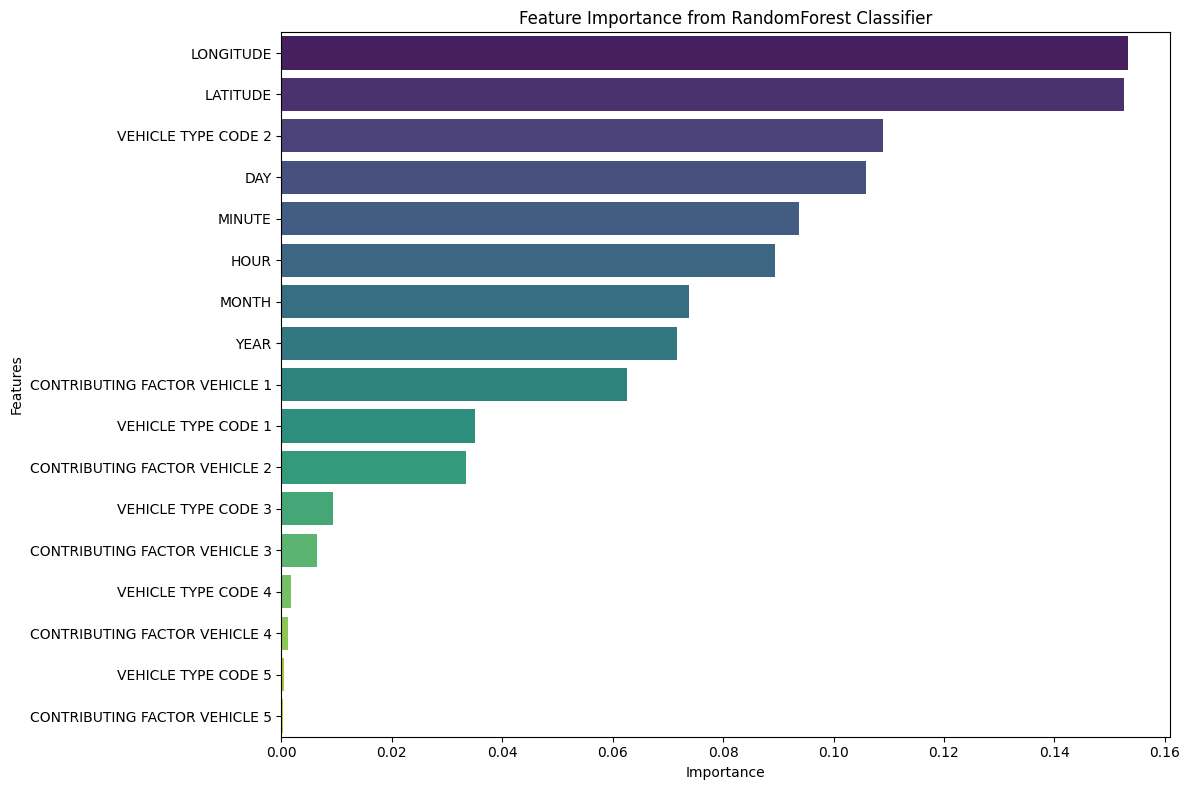

In [34]:
sorted_feature_imports = feature_imports.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=sorted_feature_imports, palette='viridis')
plt.title('Feature Importance from RandomForest Classifier')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


In [36]:
print(sorted_feature_imports)

                          Feature  Importance
1                       LONGITUDE    0.153321
0                        LATITUDE    0.152617
8             VEHICLE TYPE CODE 2    0.108974
14                            DAY    0.105942
16                         MINUTE    0.093670
15                           HOUR    0.089404
13                          MONTH    0.073873
12                           YEAR    0.071579
2   CONTRIBUTING FACTOR VEHICLE 1    0.062530
7             VEHICLE TYPE CODE 1    0.035058
3   CONTRIBUTING FACTOR VEHICLE 2    0.033454
9             VEHICLE TYPE CODE 3    0.009390
4   CONTRIBUTING FACTOR VEHICLE 3    0.006390
10            VEHICLE TYPE CODE 4    0.001819
5   CONTRIBUTING FACTOR VEHICLE 4    0.001157
11            VEHICLE TYPE CODE 5    0.000520
6   CONTRIBUTING FACTOR VEHICLE 5    0.000302


In [37]:
df.columns

Index(['LATITUDE', 'LONGITUDE', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3',
       'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5', 'CLASS TYPE', 'YEAR',
       'MONTH', 'DAY', 'HOUR', 'MINUTE'],
      dtype='object')

In [38]:
important_features = ['LATITUDE', 'LONGITUDE', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'YEAR',
       'MONTH', 'DAY', 'HOUR', 'MINUTE']
X_important = df[important_features]

In [39]:
print(X_important)

          LATITUDE  LONGITUDE   CONTRIBUTING FACTOR VEHICLE 1  \
0        40.667202 -73.866500                     Unspecified   
1        40.868160 -73.831480                     Unspecified   
2        40.751440 -73.973970             Passing Too Closely   
3        40.675884 -73.755770              Turning Improperly   
4        40.872620 -73.904686                     Unspecified   
...            ...        ...                             ...   
1057412  40.692210 -73.922930  Driver Inattention/Distraction   
1057413  40.677414 -73.930330              Turning Improperly   
1057414  40.771835 -73.907326                Backing Unsafely   
1057415  40.629425 -73.997950                     Unspecified   
1057416  40.583572 -74.086210  Driver Inattention/Distraction   

        CONTRIBUTING FACTOR VEHICLE 2                  VEHICLE TYPE CODE 1  \
0                           No factor                                Sedan   
1                         Unspecified                          

In [42]:
categorical_features = ['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2']

#one-hot encoding
X_encoded = pd.get_dummies(df[categorical_features], drop_first=True)
numerical_features = ['LATITUDE', 'LONGITUDE', 'YEAR',
       'MONTH', 'DAY', 'HOUR', 'MINUTE']
X_encoded = pd.concat([X_encoded, df[numerical_features]], axis=1)

In [43]:
X_train_imp, X_test_imp, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [44]:
model_imp = RandomForestClassifier(random_state=42)
model_imp.fit(X_train_imp, y_train)

RandomForestClassifier(random_state=42)

In [45]:
accuracy = model_imp.score(X_test_imp, y_test)
print(f"Accuracy with important features: {accuracy}")

Accuracy with important features: 0.8211874184335458
